# Random Forest applied to LendingClub data set 

Pour cet exercice, nous explorerons les données accessibles au public de [LendingClub.com] (www.lendingclub.com). Lending Club met en relation des personnes qui ont besoin d'argent (emprunteurs) et des personnes qui ont de l'argent (investisseurs). Nous essayons de créer un modèle pour prédire le risque de prêter de l'argent à quelqu'un compte tenu d'un large éventail de données sur le crédit. Nous utiliserons les données sur les prêts de 2007 à 2010 et tenterons de classer et de prédire ** si l'emprunteur a remboursé intégralement son prêt ou non. **

Voici ce que représentent les colonnes de l'ensemble de données:

* **credit.policy**: 1 si le client répond aux critères de souscription de crédit de LendingClub.com, et 0 dans le cas contraire.
* **objet**: le but du prêt (prend les valeurs "credit_card", "dette_consolidation", "education", "major_purchase", "small_business" et "all_other").
* **int.rate**: Le taux d'intérêt du prêt, en proportion (un taux de 11% serait stocké comme 0,11). Les emprunteurs jugés par LendingClub.com comme plus risqués se voient attribuer des taux d'intérêt plus élevés.
* **acompte**: les mensualités dues par l'emprunteur si le prêt est financé.
* **log.annual.inc**: Le logarithme naturel du revenu annuel autodéclaré de l'emprunteur.
* **dti**: Le ratio dette / revenu de l'emprunteur (montant de la dette divisé par le revenu annuel).
* **fico**: la cote de crédit FICO de l'emprunteur.
* **days.with.cr.line**: Le nombre de jours pendant lesquels l'emprunteur dispose d'une ligne de crédit.
* **revol.bal**: Le solde renouvelable de l'emprunteur (montant impayé à la fin du cycle de facturation par carte de crédit).
* **revol.util**: Le taux d'utilisation de la ligne renouvelable de l'emprunteur (le montant de la ligne de crédit utilisée par rapport au crédit total disponible).
* **inq.last.6mths**: Le nombre de demandes de renseignements de l'emprunteur par les créanciers au cours des 6 derniers mois.
* **delinq.2yrs**: Le nombre de fois où l'emprunteur était en souffrance depuis plus de 30 jours sur un paiement au cours des 2 dernières années.
* **pub.rec**: Le nombre de documents publics dérogatoires de l'emprunteur (dépôts de bilan, privilèges fiscaux ou jugements).
* **not.fully.paid**: Le montant des intérêts pour la classification - si l'emprunteur a remboursé l'argent en totalité ou non

# Importer des bibliothèques et un ensemble de données


In [48]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics 
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier 
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
%matplotlib inline

### Q1: Get the Data

**Utilisez des pandas pour lire loan_data.csv**

In [6]:
loan_data = pd.read_csv("/Users/digitalisdiana/Documents/DSInt_Scripts/loan_data.csv")
loan_data.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


### Q2: Consultez les méthodes info (), head () et describe () sur les prêts 

**a. info()**

In [7]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
credit.policy        9578 non-null int64
purpose              9578 non-null object
int.rate             9578 non-null float64
installment          9578 non-null float64
log.annual.inc       9578 non-null float64
dti                  9578 non-null float64
fico                 9578 non-null int64
days.with.cr.line    9578 non-null float64
revol.bal            9578 non-null int64
revol.util           9578 non-null float64
inq.last.6mths       9578 non-null int64
delinq.2yrs          9578 non-null int64
pub.rec              9578 non-null int64
not.fully.paid       9578 non-null int64
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


**b. describe()**

In [8]:
loan_data.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


Inputs and targets

In [9]:
inputs = loan_data.drop("not.fully.paid", axis = 1)
target = loan_data[["not.fully.paid"]]

**d.  Montrez le nombre d'approbation et de non approbation de crédit**.

In [12]:
print(target == 0)

      not.fully.paid
0               True
1               True
2               True
3               True
4               True
5               True
6              False
7              False
8               True
9               True
10              True
11              True
12              True
13              True
14              True
15              True
16              True
17              True
18              True
19              True
20              True
21              True
22              True
23              True
24              True
25              True
26              True
27              True
28              True
29              True
...              ...
9548           False
9549           False
9550            True
9551           False
9552            True
9553            True
9554            True
9555           False
9556            True
9557            True
9558            True
9559            True
9560            True
9561            True
9562            True
9563         

In [13]:
inputs.head()
#One hot encoding vector with 1 at i element and 7 everywhere else | Tensorflow

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0


In [14]:
set(inputs["purpose"])

{'all_other',
 'credit_card',
 'debt_consolidation',
 'educational',
 'home_improvement',
 'major_purchase',
 'small_business'}

### Caractéristiques catégoriques

La colonne **objectif** est catégorique. Nous les transformons en utilisant des variables factices afin que sklearn puisse les comprendre.

In [15]:
from sklearn.preprocessing import LabelEncoder

In [16]:
le_purpose = LabelEncoder()
inputs["purpose_n"] = le_purpose.fit_transform(inputs["purpose"])
inputs.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,purpose_n
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,2
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,1
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,2
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,2
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,1


#### PS : Next time, I'll be using OneHotEncoder so to avoid any sort of "hierarchy" in the data to be categorised

In [17]:
set(inputs["purpose"])
new_inputs = inputs.drop("purpose", axis = 1)
new_inputs.head()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,purpose_n
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,2
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,1
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,2
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,2
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,1


In [18]:
set(inputs["purpose_n"])

{0, 1, 2, 3, 4, 5, 6}

In [19]:
X = new_inputs
y = target

## Q3: Train Test Split

**a. Importez train_test_split a partir de sklearn.model_selection**

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [21]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

DecisionTreeClassifier()

[Text(143.141,221.407,'X[0] <= 0.5\ngini = 0.267\nsamples = 6704\nvalue = [5642, 1062]'),
 Text(77.4471,215.341,'X[9] <= 5.5\ngini = 0.404\nsamples = 1309\nvalue = [942, 367]'),
 Text(64.9093,209.275,'X[12] <= 5.5\ngini = 0.379\nsamples = 1001\nvalue = [747, 254]'),
 Text(57.1054,203.209,'X[5] <= 719.5\ngini = 0.365\nsamples = 937\nvalue = [712, 225]'),
 Text(52.5709,197.143,'X[3] <= 11.998\ngini = 0.384\nsamples = 799\nvalue = [592, 207]'),
 Text(49.0895,191.077,'X[5] <= 639.5\ngini = 0.373\nsamples = 765\nvalue = [575, 190]'),
 Text(48.2768,185.011,'X[3] <= 9.636\ngini = 0.48\nsamples = 10\nvalue = [4, 6]'),
 Text(47.8704,178.945,'gini = 0.0\nsamples = 4\nvalue = [4, 0]'),
 Text(48.6831,178.945,'gini = 0.0\nsamples = 6\nvalue = [0, 6]'),
 Text(49.9022,185.011,'X[1] <= 0.198\ngini = 0.369\nsamples = 755\nvalue = [571, 184]'),
 Text(49.4958,178.945,'X[4] <= 27.19\ngini = 0.367\nsamples = 753\nvalue = [571, 182]'),
 Text(46.5966,172.879,'X[4] <= 26.74\ngini = 0.374\nsamples = 718\nvalue

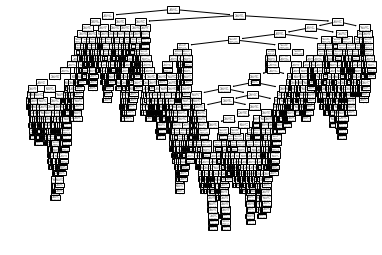

In [22]:
from sklearn import tree
tree.plot_tree(dtc)

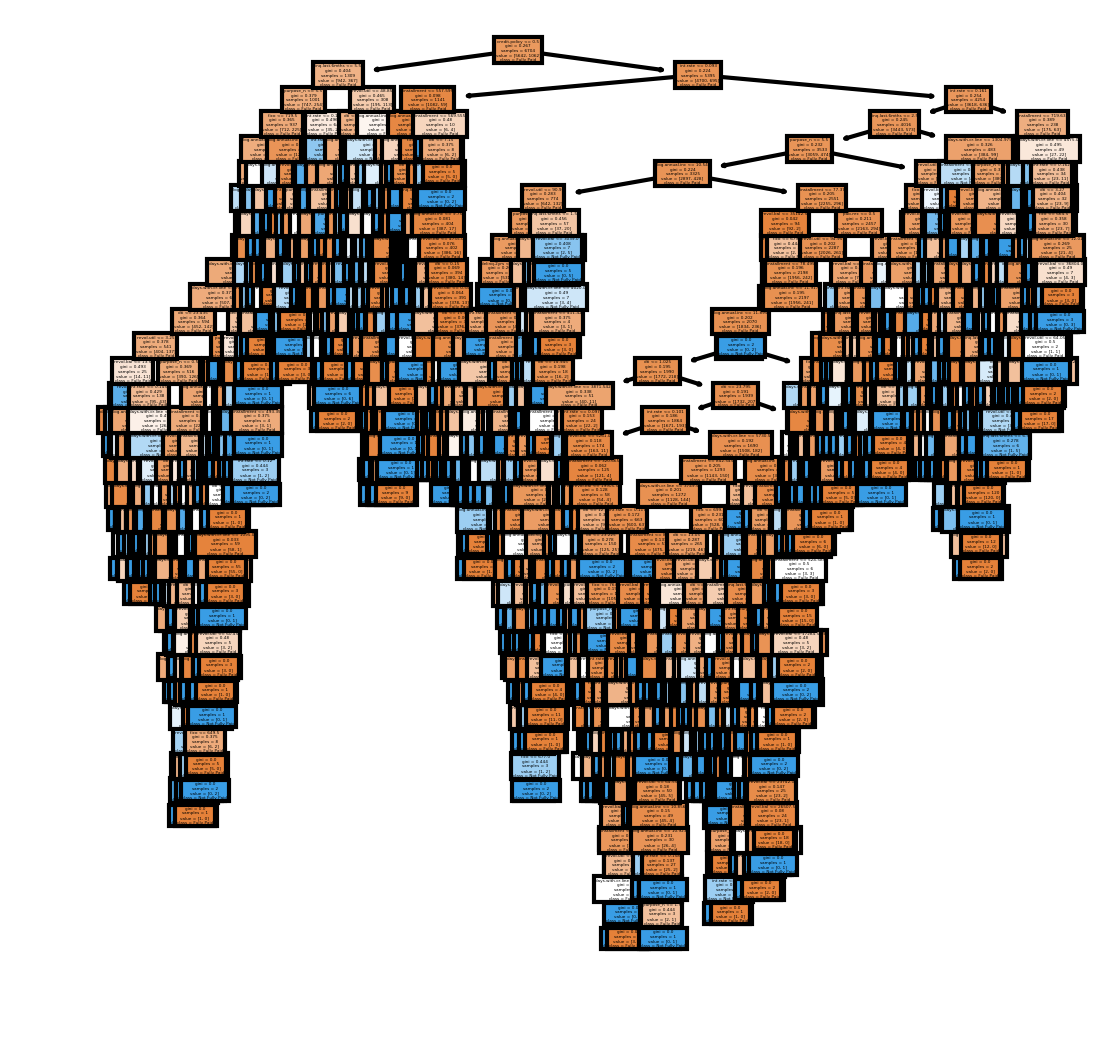

In [23]:
class_names = ["Fully Paid", "Not Fully Paid"]
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300 )
tree.plot_tree(dtc,
               feature_names = new_inputs.columns, 
               class_names = class_names,
               filled = True);
fig.savefig('my_tree.png')

In [24]:
new_inputs.head()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,purpose_n
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,2
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,1
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,2
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,2
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,1


## Q4: Entrainement du modèle d'arbre de décision

**a. Créez une instance de DecisionTreeClassifier() en itulisant le critère de gini.**

In [32]:
dtc = DecisionTreeClassifier()

**b. Entrainez le modèle sur les donnée d'entrainement.**

In [43]:
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size = 0.2)

In [60]:
dtc.fit(train_X, train_y)

DecisionTreeClassifier()

## Q5: Prédictions et évaluation de l'arbre décisionnel

**a. Créez des prédictions à partir de l'ensemble de test**

In [61]:
pred_y = dtc.predict(test_X)

In [62]:
accuracy = metrics.accuracy_score(test_y,pred_y)
accuracy

0.7390396659707724

### This is where the OneHotEncoder could have helped better predictions

**b. Importez classification_report et confusion_matrix à partir de sklearn.metrics**

**c. et créez un rapport de classification.**

In [63]:
#code ici
print(classification_report(test_y,pred_y))

              precision    recall  f1-score   support

           0       0.86      0.83      0.84      1622
           1       0.20      0.23      0.21       294

    accuracy                           0.74      1916
   macro avg       0.53      0.53      0.53      1916
weighted avg       0.76      0.74      0.75      1916



**d. Creez une matrice de confusion entre les prediction et les valeur réelles**.

In [64]:
print(confusion_matrix(test_y,pred_y))
m = confusion_matrix(test_y,pred_y)

[[1348  274]
 [ 226   68]]


In [65]:
m[0][0]

1348

**e. calculez l'accuracy en  la somme des bonnes predcitions sur le nombre totale de prédictions**.

In [66]:
accuracy = (m[0][0] + m[1][1])/(m[0][0] + m[1][1] + m[0][1] + m[1][0])
accuracy

0.7390396659707724

## Q6. Entraînement du modèle Random Forest

**a. Inmportez RandomForestClassifier à partir de _sklearn.ensemble_**

In [77]:
rfc = RandomForestClassifier(n_estimators=300)

**b. Instanciez votre modele avec 300 classifieurs**.

**c.Entrainez le modele sur les données d'entrainement**

In [78]:
rfc.fit(train_X, train_y)

/Users/digitalisdiana/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestClassifier(n_estimators=300)

## Q7. Prédictions et évaluation


**a. Prédisez la classe de not.fully.paid pour les données X_test.**

In [79]:
pred_y_2 = rfc.predict(test_X)
pred_y_2

array([0, 0, 0, ..., 0, 0, 0])

**b. Créez maintenant un rapport de classification à partir des résultats.**

In [80]:
print(classification_report(test_y,pred_y_2))

              precision    recall  f1-score   support

           0       0.85      1.00      0.92      1622
           1       0.71      0.04      0.08       294

    accuracy                           0.85      1916
   macro avg       0.78      0.52      0.50      1916
weighted avg       0.83      0.85      0.79      1916



**c. Afficher la matrice de confusion pour les prédictions.**

In [83]:
print(confusion_matrix(test_y,pred_y_2))
m = confusion_matrix(test_y,pred_y_2)

[[1617    5]
 [ 282   12]]


In [84]:
accuracy = (m[0][0] + m[1][1])/(m[0][0] + m[1][1] + m[0][1] + m[1][0])
accuracy

0.8502087682672234